In [1]:
import pandas as pd
import ast
from IPython.display import Image

from sunburst_utils import *

In [2]:
df = pd.read_csv("../01_data/preprocessedData/random_train_question.csv")

In [3]:
df.head()

,Unnamed: 0,text_title,paragraph_text,question_id,question_text,question_token,question_pos,question_tag,question_parse_tree,correct_answer_text,...,correct_masked_answer_text_token,correct_masked_answer_sentence_token,plausible_answer_text,plausible_answer_sentence,plausible_answer_sentences_token,plausible_answer_char_index,plausible_answer_token_index,plausible_masked_answer_text_token,plausible_masked_answer_sentence_token,paragraph_tokens
0,0,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,"['When', 'did', 'Beyonce', 'start', 'becoming'...","['ADV', 'AUX', 'PROPN', 'VERB', 'VERB', 'ADJ',...","['WRB', 'VBD', 'NNP', 'VB', 'VBG', 'JJ', '.']",(ROOT\n (SBARQ\n (WHADVP (WRB When))\n ...,['in the late 1990s'],...,"[['beyoncé', 'giselle', 'knowles', '-', 'carte...","[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter..."
1,1,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,"['What', 'areas', 'did', 'Beyonce', 'compete',...","['DET', 'NOUN', 'AUX', 'PROPN', 'VERB', 'ADP',...","['WDT', 'NNS', 'VBD', 'NNP', 'VB', 'RP', 'WRB'...",(ROOT\n (FRAG\n (SBAR\n (WHNP (WDT Wh...,['singing and dancing'],...,"[['beyoncé', 'giselle', 'knowles', '-', 'carte...","[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter..."
2,2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,"['When', 'did', 'Beyonce', 'leave', 'Destiny',...","['ADV', 'AUX', 'PROPN', 'VERB', 'PROPN', 'PART...","['WRB', 'VBD', 'NNP', 'VB', 'NNP', 'POS', 'NNP...",(ROOT\n (SBARQ\n (WHADVP (WRB When))\n ...,['2003'],...,"[['beyoncé', 'giselle', 'knowles', '-', 'carte...","[['their', 'hiatus', 'saw', 'the', 'release', ...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter..."
3,3,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,"['In', 'what', 'city', 'and', 'state', 'did', ...","['ADP', 'PRON', 'NOUN', 'CCONJ', 'NOUN', 'AUX'...","['IN', 'WP', 'NN', 'CC', 'NN', 'VBD', 'NNP', '...",(ROOT\n (SBARQ\n (WHPP\n (IN In)\n ...,"['Houston, Texas']",...,"[['beyoncé', 'giselle', 'knowles', '-', 'carte...","[['born', 'and', 'raised', 'in', '<<Answer>>',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter..."
4,4,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,"['In', 'which', 'decade', 'did', 'Beyonce', 'b...","['ADP', 'DET', 'NOUN', 'AUX', 'PROPN', 'VERB',...","['IN', 'WDT', 'NN', 'VBD', 'NNP', 'VB', 'JJ', ...",(ROOT\n (SBARQ\n (WHPP (IN In) (WHNP (WDT ...,['late 1990s'],...,"[['beyoncé', 'giselle', 'knowles', '-', 'carte...","[['born', 'and', 'raised', 'in', 'houston', ',...",[],[],[],[],[],[],[],"['Beyoncé', 'Giselle', 'Knowles', '-', 'Carter..."


In [4]:
df["question_token"] = [ast.literal_eval(liste) for liste in df["question_token"]]
df["token1"] = [question[0] if len(question)>0 else ""  for question in df["question_token"]]
df["token2"] = [question[1] if len(question)>1 else "" for question in df["question_token"]]
df["token3"] = [question[2] if len(question)>2 else "" for question in df["question_token"]]
df["token4"] = [question[3] if len(question)>3 else "" for question in df["question_token"]]
df["token5"] = [question[4] if len(question)>4 else "" for question in df["question_token"]]

In [5]:
levels = ['token5','token4','token3','token2','token1'] # levels used for the hierarchical chart
color_columns = 'count'
value_column = 'count'

df_all_trees = build_hierarchical_dataframe(df, levels, value_column, color_columns)

In [24]:
import plotly.express as px
fig =px.sunburst(
    df_all_trees,
    names='name',
    ids='id',
    parents='parent',
    values='value',
    branchvalues='total',
    maxdepth=4,
    height=700
)

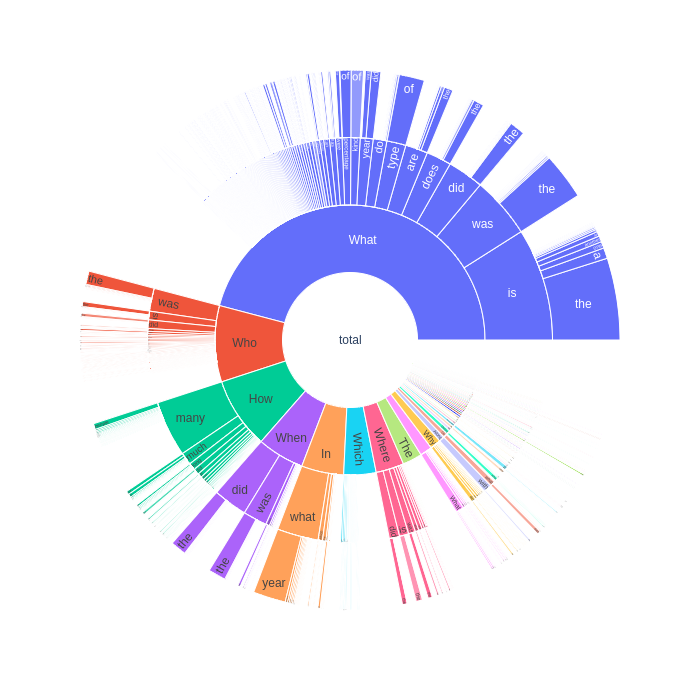

In [25]:
filename="images/questions/sunburst_first_token.png"
fig.write_image(filename)
Image(filename)